## **PERSONALITY PREDICTION SYSTEM**
Simple demostration of using data mining concepts and python data science libraries to analyse and classify personalities of a given set of people or an individual.

The project uses learning algorithms and advanced data mining concepts to mine user characteristics data and learn from the patterns.

This project will come across areas where it has access to large amounts of person behavioral data. This data can be helpful to classify persons using Automated personality prediction and classification.

Five characteristics of different individuals commonly known as big five characteristics namely, openness, neuroticism, conscientiousness, agreeableness and extraversion are stored in a dataset and used for training.

**Let's we see about personality prediction data set:**
 
 The system analyses user characteristics and behaviors. System then predicts new user personality based on personality data stored by classification of previous user data.\n",
       
**Import the necessary modules and take a look at the data:**

In [ ]:
import pandas as pd
from numpy import *
import numpy as np
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn import neighbors

**Describing dataset**

In [ ]:
data =pd.read_csv('train dataset.csv')
array = data.values

In [ ]:
for i in range(len(array)):
	if array[i][0]=="Male":
		array[i][0]=1
	else:
		array[i][0]=0


In [ ]:
df=pd.DataFrame(array)

**source:**

In [ ]:
maindf =df[[0,1,2,3,4,5,6]]
mainarray=maindf.values
print (mainarray)

[[0 17 7 ... 7 3 2]
 [0 19 4 ... 4 6 6]
 [0 18 7 ... 4 5 5]
 ...
 [0 22 5 ... 3 6 1]
 [0 19 5 ... 5 7 5]
 [0 18 5 ... 7 6 5]]


In [ ]:
temp=df[7]
train_y =temp.values
# print(train_y)
# print(mainarray)
train_y=temp.values

In [ ]:
for i in range(len(train_y)):
	train_y[i] =str(train_y[i])

In [ ]:
testdata =pd.read_csv('test dataset.csv')
test = testdata.values

In [ ]:
data.shape

(709, 8)

**logisticRegression:**

In [ ]:
mul_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg',max_iter =1000)
mul_lr.fit(mainarray, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

**test data:**

In [ ]:
testdata.describe()

,Age,openness,neuroticism,conscientiousness,agreeableness,extraversion
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,20.244444,4.850794,4.584127,4.812698,4.844444,4.926984
std,2.616811,1.537211,1.818623,1.786315,1.718555,1.466527
min,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,18.000000,4.000000,3.000000,4.000000,4.000000,4.000000
50%,20.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,22.000000,6.000000,6.000000,6.000000,6.000000,6.000000
max,28.000000,8.000000,9.000000,9.000000,8.000000,8.000000


In [ ]:
testdata.shape

(315, 8)

In [ ]:
for i in range(len(test)):
	if test[i][0]=="Male":
		test[i][0]=1
	else:
		test[i][0]=0

In [ ]:
df1=pd.DataFrame(test)

In [ ]:
testdf =df1[[0,1,2,3,4,5,6]]
maintestarray=testdf.values
print(maintestarray)

[[0 20 7 ... 9 5 5]
 [1 17 5 ... 5 2 4]
 [0 25 5 ... 7 2 4]
 ...
 [1 18 7 ... 6 2 7]
 [1 23 6 ... 5 4 3]
 [0 18 5 ... 3 5 6]]


In [ ]:
y_pred = mul_lr.predict(maintestarray)
for i in range(len(y_pred)) :
	y_pred[i]=str((y_pred[i]))
DF = pd.DataFrame(y_pred,columns=['Predicted-Personality'])
DF.index=DF.index+1
DF.index.names = ['Person-No']
DF.to_csv("out.csv")

**output:**

In [ ]:
output=pd.read_csv('out.csv')
output

,Person-No,Predicted-Personality
0,1,dependable
1,2,responsible
2,3,serious
3,4,serious
4,5,responsible
...,...,...
310,311,lively
311,312,serious
312,313,dependable
313,314,extraverted


**bar chart for data age values:**


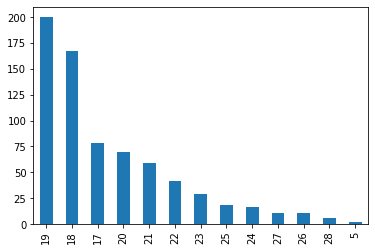

In [ ]:
data.Age.value_counts().plot.bar()

**ouput: predicted-personality**

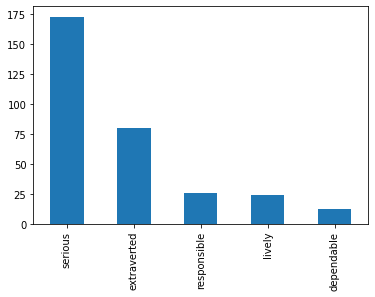

In [ ]:
output["Predicted-Personality"].value_counts().plot.bar()